<div align="center"><font color='blue'>
<h2>Mini Projeto - Fraud Analytics</h2>
<h3>Data Quality Report e Detecção de Fraudes em Transações Imobiliárias</h3></font>
</div>

### Definição do Problema
  Uma empresa fornece seguros para imóveis na cidade de Nova Iorque nos EUA. Os dados são públicos e fornecidos pelo portal de dados abertos da cidade de Nova Iorque.
- Primeiro a empresa precisa de um relatório que demonstre que os dados são confiáveis e coerentes e que a qualidade da informação que eles oferecem pode ser usada para prever possíveis fraudes. Sendo assim, deve apresentar um DQR –Data Quality Report.
-Na segunda etapa a empresa precisa de um score para cada transação a fim de checar aquelas com maior possibilidadede de ter alguma fraude. O Score de Fraude (Fraud Score) deve ser o mais preciso possível e deve ser gerado um score para cada transação. Não há informação prévia se uma transação foi ou não fraudulenta.

Dados: https://data.cityofnewyork.us/Housing-Development/Property-Valuation-and-Assessment-Data/rgy2-tti8

<h3><font color='blue'>Etapa 1 - Data Quality Report (DQR)</font></h3>
<p>O DQR é um relatório analítico com o objetivo de compreender a organização dos dados, se estão coerentes, se há alguma anomalia amplamente visível e resumir os dados (ou pelo menos as variáveis mais importantes) com base na compreensão do problema de negócio.

A descrição do que representa cada variável está disponível no Dicionário de Dados e no material complementar no link abaixo:

https://www1.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page

In [1]:
# Versão da Linguagem Python
from platform import python_version
print(" Versão da Linguagem Python Usada Nesse Jupyter é:" , python_version())

 Versão da Linguagem Python Usada Nesse Jupyter é: 3.9.7


### Instalando e Carregando os pacotes

In [2]:
!pip install -q -U watermark

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x : '%.2f' % x) # para ter única formatação para todos os graficos, padrão numérico em decimal
%matplotlib inline

In [4]:
# Versões dos pacotes usados
%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.2
numpy     : 1.20.3
pandas    : 1.3.4
matplotlib: 3.4.3



### Resumo dos Dados

In [5]:
dados = pd.read_csv("dados/dataset.csv", index_col= 0)

In [6]:
dados.shape

(1070994, 31)

In [7]:
dados.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [8]:
# Resumo
print("Linhas: ", dados.shape[0])
print("Colunas: ", dados.shape[1])
print("\nVariáveis: \n", dados.columns.tolist())
print("\nValores Ausentes:\n", dados.isnull().sum())
print("\nValores únicos: \n", dados.nunique())

Linhas:  1070994
Colunas:  31

Variáveis: 
 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores Ausentes:
 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64


In [9]:
# Informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non

In [10]:
# Variáveis numéricas(quantitativas)
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', 
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

In [11]:
# Variáveis categóricas(qualitativas)
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [12]:
len(num_cols) + len(cat_cols) == 31

True

In [13]:
# Dataframes com os tipos diferentes de variáveis
df_num = dados[num_cols]
df_cat = dados[cat_cols]

In [14]:
# Sumário estatístico das variáveis numéricas
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Tipo de Dado'] = df_num.dtypes.values
summ_num['# Registros Não Nulos'] = df_num.count().values
summ_num['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populado'] = round(summ_num['# Registros Não Nulos'] / df_num.shape[0]*100,2)
summ_num['# Valores Únicos'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


In [15]:
# Sumário estatístico das variáveis categóricas
summ_cat = pd.DataFrame(index=df_cat.columns)
summ_cat['Tipo de Dado'] = df_cat.dtypes.values
summ_cat['# Registros Não Nulos'] = df_cat.count().values
summ_cat['% Populado'] = round(summ_cat['# Registros Não Nulos'] / df_cat.shape[0]*100,2)
summ_cat['# Valores Únicos'] = df_cat.nunique().values

In [16]:
# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Valores Mais Comuns'] = temp

In [17]:
summ_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
BBLE,object,1070994,100.00,1070994,1000010101
B,int64,1070994,100.00,5,4
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
EXT,object,354305,33.08,3,G
EXCD1,float64,638488,59.62,129,1017.00


### Identificação, Exploração e Visualização das Variáveis

In [18]:
# Variáveis
dados.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [19]:
dados.head(5)

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


**Variável 1** \
Nome da Variável: BBLE \
Descrição: Concatenação de código Borough, código de bloco, código LOT; um número exclusivo para cada registro.

**Variável 2** \
Nome da Variável: B \
Descrição: Códigos Borough

Text(0.5, 1.0, 'Número de Propriedades em Diferentes Bairros')

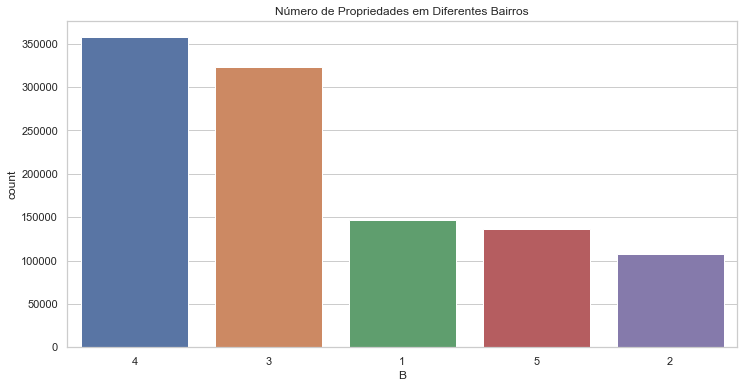

In [20]:
# Vizualização da variável 2
sns.set_theme(style= 'whitegrid')
plt.figure(figsize= (12,6))
fig1 = sns.countplot(x = 'B', data= dados, order= dados['B']. value_counts().index)
plt.title('Número de Propriedades em Diferentes Bairros')

**Variável 3** \
Nome da Variável: BLOCK \
Descrição: Número de até 5 dígitos que representam códigos de bloco em diferentes bairros

In [21]:
# Contagem
BLOCK = df_cat['BLOCK'].value_counts().rename_axis('Unique_values_BLOCK').reset_index(name = 'Counts')

BLOCK[:15]

,Unique_values_BLOCK,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


**Variável 4** \
Nome da Variável: LOT \
Descrição: Número de até 4 dígitos que representam códigos de lote em diferentes Borough & Block

In [22]:
# Contagem
LOT = df_cat['LOT'].value_counts().rename_axis('Unique_values_LOT').reset_index(name = 'Counts')
LOT[:15]


,Unique_values_LOT,Counts
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982
7,18,11979
8,25,11949
9,21,11840


**Variável 5** \
Nome da Variável: EASEMENT \
Descrição: Tipos de easement

Text(0.5, 1.0, 'Quantidade de Imóveis com Diversos Tipos de Easement')

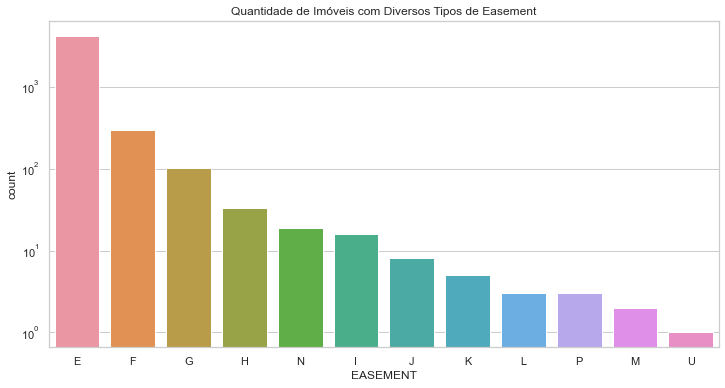

In [23]:
# Visualização da variável 5
sns.set_theme(style= 'whitegrid')
plt.figure(figsize= (12,6))
fig2 = sns.countplot(x = 'EASEMENT', data= dados, order= dados['EASEMENT'].value_counts().index)
fig2.set_yscale('log')
fig2.set_title('Quantidade de Imóveis com Diversos Tipos de Easement')

**Variável 6** \
Nome da Variável: OWNER \
Descrição: Proprietários dos imóveis

In [24]:
OWNER = df_cat['OWNER'].value_counts().rename_axis('Unique_values_OWNER').reset_index(name = 'Counts')

In [25]:
# Primeiras linhas
OWNER.head()

,Unique_values_OWNER,Counts
0,PARKCHESTER PRESERVAT,6020
1,PARKS AND RECREATION,4255
2,DCAS,2169
3,HOUSING PRESERVATION,1904
4,CITY OF NEW YORK,1450


In [26]:
# Últimas linhas
OWNER.tail()

,Unique_values_OWNER,Counts
863341,ELARIO ALTERNO,1
863342,"CHARLES,VIRGINIA",1
863343,"HAYLES, HEATHER",1
863344,GLENDORA HARVEY,1
863345,EDWARD DONOHUE,1


**Variável 7** \
Nome da Variável: BLDGCL \
Descrição: Classe do Imóvel

In [27]:
BLDGCL = df_cat['BLDGCL'].value_counts().rename_axis('Unique_value_BLDGCL').reset_index(name = 'Counts')

In [28]:
BLDGCL.head()

,Unique_value_BLDGCL,Counts
0,R4,139879
1,A1,123369
2,A5,96984
3,B1,84208
4,B2,77598


In [29]:
BLDGCL.tail()

,Unique_value_BLDGCL,Counts
195,I2,4
196,I3,4
197,H7,3
198,E6,1
199,Y5,1


**Variável 8** \
Nome da Variável: TAXCLASS \
Descrição: Código de classes de imposto de propriedade

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Classe')

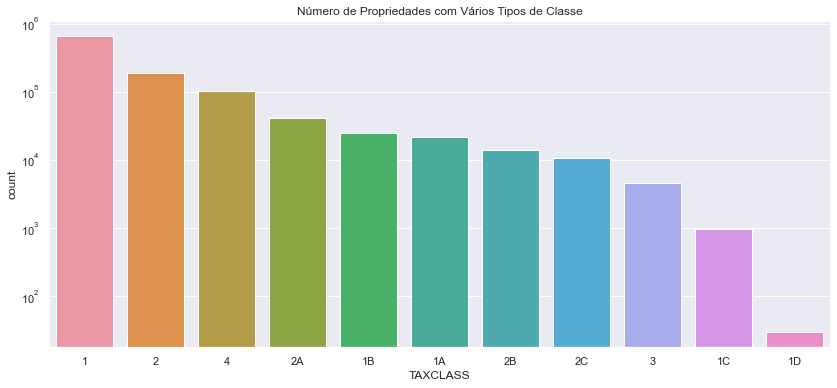

In [30]:
# Visualização da variável 8
sns.set_theme(style = 'darkgrid')
plt.figure(figsize= (14,6))
fig3 = sns.countplot(x = 'TAXCLASS', data=dados, order= dados['TAXCLASS'].value_counts().index)
fig3.set_yscale("log")
fig3.set_title('Número de Propriedades com Vários Tipos de Classe')


**Variável 9** \
Nome da Variável: LTFRONT \
Descrição: Frente do lote em pés(feet)

In [31]:
# Divide em percentis
dados['LTFRONT'].describe(percentiles= [0.5, 0.75, 0.995])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.5%       375.00
max        9999.00
Name: LTFRONT, dtype: float64

In [32]:
# Filtra por valores iguais ou menores que 375
tmp = dados[dados['LTFRONT'] <= 375]

Text(0.5, 1.0, 'Distribuição da Variável LTFRONT')

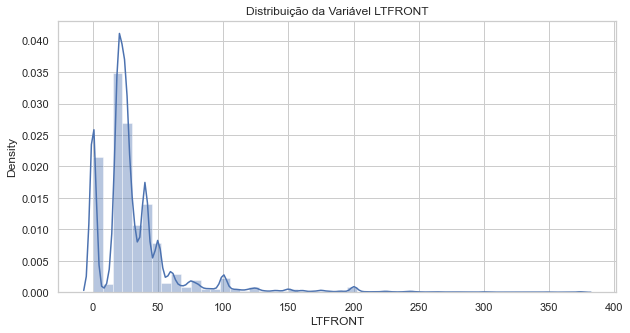

In [33]:
# Visualização da variável 9
sns.set_theme(style= 'whitegrid')
plt.figure(figsize= (10, 5))
fig4 = sns.distplot(tmp.LTFRONT, bins = 50)
fig4.set_title('Distribuição da Variável LTFRONT')

**Variável 10** \
Nome da Variável: LTDEPTH \
Descrição: Profundidade do lote em pés(feet)

In [34]:
# Divide em percentis
dados['LTDEPTH'].describe(percentiles= [0.18,0.25, 0.4, 0.83, 0.98, 0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
18%           49.00
25%           80.00
40%          100.00
50%          100.00
83%          101.00
98%          200.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [35]:
# Filtra por valores iguais ou menores que 425
tmp = dados[dados['LTDEPTH'] <= 425]

Text(0.5, 1.0, 'Distribuição da Variável LTDEPTH')

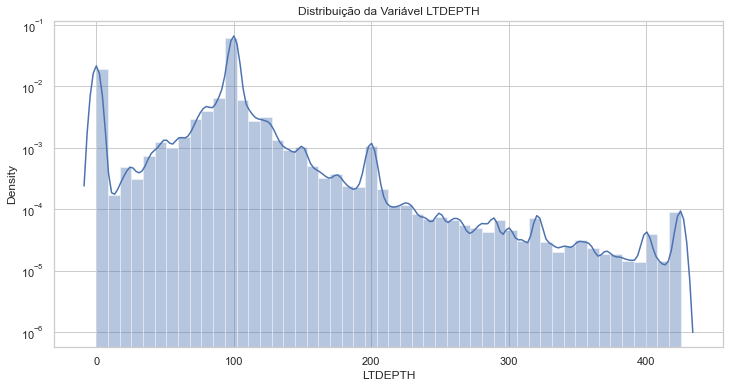

In [36]:
# Visualização da variável 10
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
fig5 = sns.distplot(tmp.LTDEPTH, bins=50)
fig5.set_yscale('log')
fig5.set_title('Distribuição da Variável LTDEPTH')

**Variável 11** \
Nome da Variável: EXT \
Descrição: E-Extension, G-Garage, EG-Extension e Garage

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Extensões / Garagem')

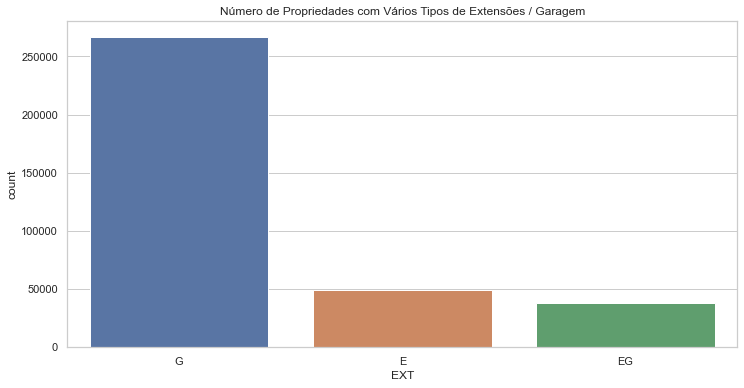

In [37]:
# Visualização da variável 11
sns.set_theme(style= 'whitegrid')
plt.figure(figsize= (12,6))
fig6 = sns.countplot(x = 'EXT', data=dados, order= dados['EXT'].value_counts().index)
fig6.set_title('Número de Propriedades com Vários Tipos de Extensões / Garagem')

**Variável 12** \
Nome da Variável: STORIES \
Descrição: Número de andares do edifício

In [38]:
# Divide em percentis
dados['STORIES'].describe(percentiles=[0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [39]:
# Filtro
tmp = dados[dados['STORIES'] <= 50]

Text(0.5, 1.0, 'Distribuição de Andares das Propriedades')

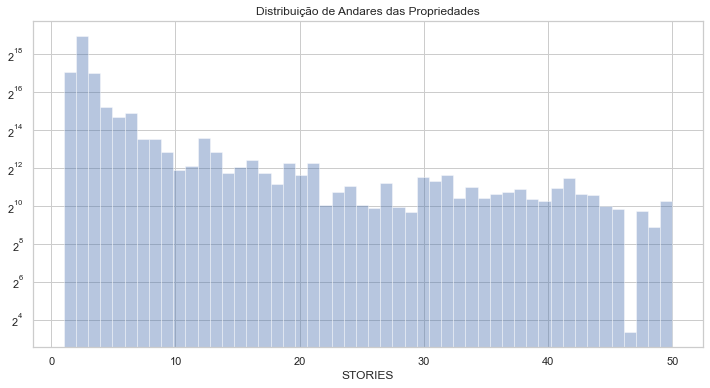

In [40]:
# Visualização da variável 12
sns.set_theme(style= 'whitegrid')
plt.figure(figsize= (12,6))
fig7 = sns.distplot(tmp['STORIES'], kde = False, bins = 50)
fig7.set_yscale('log', basey = 2)
fig7.set_title('Distribuição de Andares das Propriedades')

**Variável 13** \
Nome da Variável: FULLVAL \
Descrição: Valor de Mercado Total

In [41]:
dados['FULLVAL'].describe(percentiles= [0.5,0.75,0.95])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [42]:
dados['FULLVAL'].head()

RECORD
1    21400000.00
2   193800000.00
3   104686000.00
4    39200000.00
5   272300000.00
Name: FULLVAL, dtype: float64

In [43]:
# Filtra os dados para simplificar a visualização e evitar valores extremos
tmp = dados[dados['FULLVAL'] <= 3000000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado Total das Propriedades')

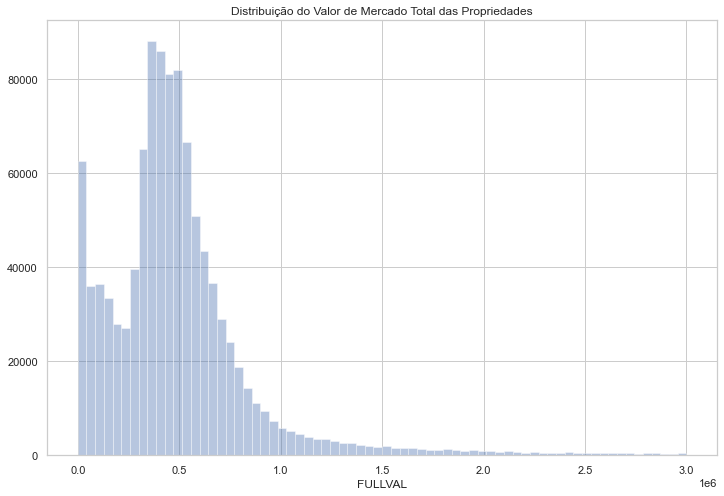

In [44]:
# Visualização da variável 13
dimensoes = (12,8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig8 = sns.distplot(tmp.FULLVAL, kde = False, bins = 70)
fig8.set_title('Distribuição do Valor de Mercado Total das Propriedades')

**Variável 14** \
Nome da Variável: AVLAND \
Descrição: Valor de mercado do terreno

In [45]:
# Divide em percentis
dados['AVLAND'].describe(percentiles=[0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [46]:
# Filtro
tmp = dados[dados['AVLAND'] <= 50000]

dimensoes = (12, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig9 = sns.distplot(tmp.AVLAND, kde= False, bins = 80)
fig9.set_title("Distribuição do Valor de Mercado do Terreno das Propriedades")

**Variável 15** \
Nome da Variável: EXLAND \
Descrição: Valor provisório do terreno com isenção temporária

In [47]:
# Divide em percentis
dados['EXLAND'].describe(percentiles=[0.5, 0.75, 0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [48]:
# Filtro
tmp = dados[dados['EXLAND'] <= 20000]

Text(0.5, 1.0, 'Valor Provisório do Terreno com Isenção Temporária')

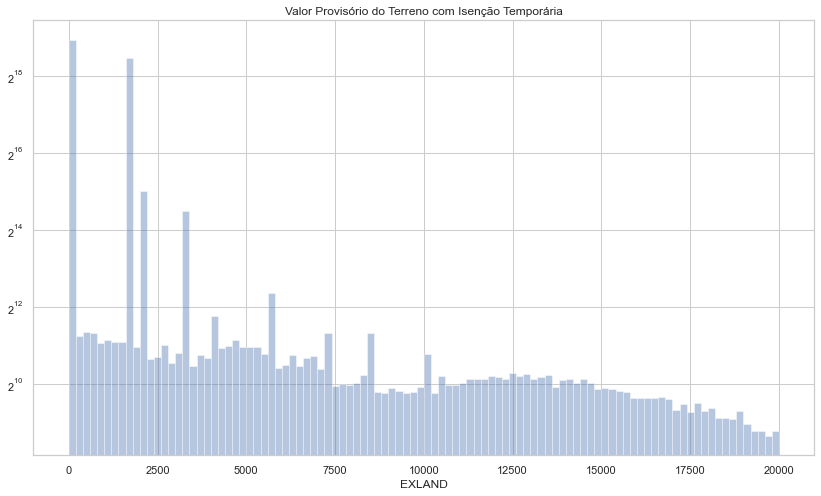

In [49]:
# Visualização da variável 15
dimensoes = (14,8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig10 = sns.distplot(tmp.EXLAND, kde = False, bins = 100)
fig10.set_yscale('log', basey =2)
fig10.set_title('Valor Provisório do Terreno com Isenção Temporária')

### <font color='blue'>Etapa 2 - Modelagem</font>

- Será aplicada uma abordagem via aprendizado **não supervisionado** criando scores(pontuações) de fraude para cada transação imobiliária.
-Serão criados 2 scores com técnicas diferentes de Machine Learning e depois serão unidos os scores e apresentado o score final.

### Instalando e Carregando os Pacotes

In [50]:
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', None)

In [51]:
df = pd.read_csv('dados/dataset.csv')
df.shape

(1070994, 32)

In [52]:
# Será usada uma cópia do dataframe
df_temp = df.copy()

### Limpeza e Transformação dos Dados

#### Limpeza de valores ausentes da variável ZIP

In [53]:
# Contagem de valores ausentes
df_temp['ZIP'].isna().sum()

29890

In [54]:
# Calcula a moda(valor de mais frenquência) da variável zip
# Se não houver nenhum valor da moda, substitua por 1
def calcula_moda(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [55]:
# Definindo a função de contagem para calcular a frequência do valor da moda de cada grupo(será definido)
def contagem(x):
    return x.value_counts().head(1)

In [56]:
# Agrupando valores pela variável 'B' e 'BLOCK' e usando as duas funções acima para criar dataframe auxiliar
# Apresentará o valor da moda da variável ZIP para cada grupo com registros com as variáveis B e BLOCK
df_zip_group = df_temp.groupby(['B', 'BLOCK'])['ZIP'].agg(ZIP = calcula_moda, Count = contagem).reset_index()

In [57]:
df_zip_group.head()

,B,BLOCK,ZIP,Count
0,1,1,10004.00,2
1,1,2,10004.00,2
2,1,3,10004.00,4
3,1,4,10004.00,53
4,1,5,10004.00,9


In [58]:
df_zip_group.tail()

,B,BLOCK,ZIP,Count
28861,5,8046,10307.00,34
28862,5,8047,10307.00,30
28863,5,8048,10307.00,44
28864,5,8049,10307.00,21
28865,5,8050,10307.00,30


In [59]:
# Para os grupos sem valor de moda, será comparada a frequência do grupo, um grupo abaixo e um grupo acima
# Será inserido o valor do ZIP do grupo com maior frequência
for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP'] ==1):
        if df_zip_group.loc[i -1, 'Count'] > df_zip_group.loc[i +1, 'Count']:
            val = df_zip_group.loc[i -1, 'ZIP']
        else:
            val = df_zip_group.loc[i + 1, 'ZIP']
        df_zip_group.loc[i, 'ZIP'] = val

In [60]:
# Verifica os primeiros registros
df_zip_group.head(10)

,B,BLOCK,ZIP,Count
0,1,1,10004.00,2
1,1,2,10004.00,2
2,1,3,10004.00,4
3,1,4,10004.00,53
4,1,5,10004.00,9
5,1,6,10004.00,2
6,1,7,10004.00,15
7,1,8,10004.00,6
8,1,9,10004.00,4
9,1,10,10004.00,8


In [61]:
# Função que preenche os registros com valor ZIP ausente por meio do dataframe auxiliar
def preenche_moda(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [62]:
# Usando a função para preencher os valores ZIP ausentes
df_temp['ZIP'] = df_temp.apply(preenche_moda, axis = 1)

In [63]:
# Verifica se há algum valor ZIP restante com valor NA
df_temp['ZIP'].isna().sum()

0

In [64]:
# Verifica manualmente uma das ocorrências para checar se a fórmula funcionou corretamente
df_temp[(df_temp['B']==1) & (df_temp['BLOCK'] == 36)]['ZIP']

6092   10005.00
6093   10005.00
6094   10005.00
6095   10005.00
Name: ZIP, dtype: float64

In [65]:
df_temp.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [66]:
# Salvar o dataframe
df_temp.to_csv('dados/dataset_zip_limpo.csv')

In [67]:
df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)

In [68]:
# Cria cópia da estrutura do dataframe
df_temp2 = df_temp.copy()

### Limpando Valores Ausentes das Variáveis:
FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT, LTDEPTH

In [69]:
# Substituindo valores vazios por valores NaN para garantir que a função fillna funcione nas próximas etapas
df_temp2.replace(0, np.nan,inplace = True)

In [70]:
# Definindo a lista de variáveis a serem preenchidas
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

In [71]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, '--> Número de vaores ausentes:', df_temp2[i].isna().sum())

FULLVAL --> Número de vaores ausentes: 13007
AVLAND --> Número de vaores ausentes: 13009
AVTOT --> Número de vaores ausentes: 13007
BLDFRONT --> Número de vaores ausentes: 228815
BLDDEPTH --> Número de vaores ausentes: 228853
LTFRONT --> Número de vaores ausentes: 169108
LTDEPTH --> Número de vaores ausentes: 170128


In [72]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e BLDGCL se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP', 'BLDGCL'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [73]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, '--> Número de valores ausentes:', df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 10294
AVLAND --> Número de valores ausentes: 10294
AVTOT --> Número de valores ausentes: 10294
BLDFRONT --> Número de valores ausentes: 75202
BLDDEPTH --> Número de valores ausentes: 75218
LTFRONT --> Número de valores ausentes: 16025
LTDEPTH --> Número de valores ausentes: 17764


In [74]:
# Preenche os registros vazios com a mediana do grupo ZIP e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP', 'TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [75]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, '-->Número de Valores ausentes:', df_temp2[i].isna().sum())

FULLVAL -->Número de Valores ausentes: 3915
AVLAND -->Número de Valores ausentes: 3915
AVTOT -->Número de Valores ausentes: 3915
BLDFRONT -->Número de Valores ausentes: 31226
BLDDEPTH -->Número de Valores ausentes: 31130
LTFRONT -->Número de Valores ausentes: 3092
LTDEPTH -->Número de Valores ausentes: 3146


In [76]:
# Preenche os registros ausentes com a mediana do grupo B e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B', 'TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [77]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, '--> Número de valores ausentes:', df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 678
AVLAND --> Número de valores ausentes: 678
AVTOT --> Número de valores ausentes: 678
BLDFRONT --> Número de valores ausentes: 22317
BLDDEPTH --> Número de valores ausentes: 18831
LTFRONT --> Número de valores ausentes: 2
LTDEPTH --> Número de valores ausentes: 2


In [78]:
# Preenchendo os registros ausentes com mediana do grupo B se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [79]:
# Contagem
for i in list_fill:
    print(i, '--> Número de valores ausentes:', df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 0
AVLAND --> Número de valores ausentes: 0
AVTOT --> Número de valores ausentes: 0
BLDFRONT --> Número de valores ausentes: 0
BLDDEPTH --> Número de valores ausentes: 0
LTFRONT --> Número de valores ausentes: 0
LTDEPTH --> Número de valores ausentes: 0


### Limpando Valores Ausente da Variável STORIES

In [80]:
# Checa valores ausente
print('STORIES', '-->Número de valores ausentes:', df_temp2['STORIES'].isna().sum())

STORIES -->Número de valores ausentes: 56264


In [81]:
# Imputação da mediana com base nos grupos de ZIP e BLDGCL
df_temp2['STORIES'] = df_temp2.groupby(['ZIP', 'BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [82]:
# Contagem
print('STORIES', '--> Número de valores ausentes', df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes 42102


In [83]:
# Imputação da mediana com base nos grupos de BLDGCL e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [84]:
# Contagem dos valores ausentes
print('STORIES', '--> Número de valores ausentes:', df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 4280


In [85]:
# Imputação da mediana com base nos grupos de TAXCLASS e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['TAXCLASS'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [86]:
# Contagem dos valores ausentes
print('STORIES', '--> Número de valores ausentes:', df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 0


In [87]:
# Salvando resultado em disco
df_temp2.to_csv('dados/dataset_variaveis_limpo.csv')

### Engenharia de Atributos
- Criação de variáveis a partir de operações com as variáveis existentes.

In [88]:
# Cópia do dataframe
df_proc = df_temp2.copy()

In [89]:
# Calculo AREA1
df_proc['AREA1'] = df_proc['LTFRONT'] * df_proc['LTDEPTH']

In [90]:
# Visualzia a amostra
df_proc[['AREA1', 'LTFRONT', 'LTDEPTH']].head()

,AREA1,LTFRONT,LTDEPTH
0,523000.00,500.00,1046.00
1,9585.00,27.00,355.00
2,399876.00,709.00,564.00
3,436943.00,793.00,551.00
4,406980.00,323.00,1260.00


In [91]:
# Cálculo AREA2
df_proc['AREA2'] = df_proc['BLDFRONT'] * df_proc['BLDDEPTH']

In [92]:
# Visualiza amostra
df_proc[['AREA2', 'BLDFRONT', 'BLDDEPTH']].head()

,AREA2,BLDFRONT,BLDDEPTH
0,121476.00,382.00,318.00
1,121476.00,382.00,318.00
2,399876.00,709.00,564.00
3,46835.00,85.00,551.00
4,5073.00,89.00,57.00


In [93]:
# Cálculo AREA3
df_proc['AREA3']= df_proc['AREA2'] * df_proc['STORIES']

In [94]:
# Visualiza AREA3
df_proc[['AREA2', 'STORIES', 'AREA3']].head()

,AREA2,STORIES,AREA3
0,121476.00,4.00,485904.00
1,121476.00,1.00,121476.00
2,399876.00,3.00,1199628.00
3,46835.00,2.00,93670.00
4,5073.00,1.00,5073.00


In [95]:
# Dividindo FULLVAL, AVLAND e AVTOT pelas variáveis recém criadas AREA1, AREA2 e AREA3 para gerar um índice
k =1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['AREA1', 'AREA2', 'AREA3']:
        indice_area = 'ind' + str(k)
        df_proc[indice_area] = df_proc[i] / df_proc[j]
        print(indice_area + ' é a combinação feita entre', i, j)
        k += 1

ind1 é a combinação feita entre FULLVAL AREA1
ind2 é a combinação feita entre FULLVAL AREA2
ind3 é a combinação feita entre FULLVAL AREA3
ind4 é a combinação feita entre AVLAND AREA1
ind5 é a combinação feita entre AVLAND AREA2
ind6 é a combinação feita entre AVLAND AREA3
ind7 é a combinação feita entre AVTOT AREA1
ind8 é a combinação feita entre AVTOT AREA2
ind9 é a combinação feita entre AVTOT AREA3


In [96]:
# Visualiza a amostra
df_proc.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.00,1260.00,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004,X1,89.00,57.00,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR,406980.00,5073.00,5073.00,669.07,53676.33,53676.33,297.43,23861.62,23861.62,301.08,24154.35,24154.35


In [97]:
df_proc['ZIP'].dtype

dtype('O')

In [98]:
# Converte o tipo da variável zip para string
df_proc['ZIP'] = df_proc['ZIP'].astype(int).astype(str)

In [99]:
df_proc['ZIP'].dtype

dtype('O')

In [100]:
# Lista de variáveis apra o agrupamento abaixo
list_groupby = ['ZIP', 'TAXCLASS', 'B']

In [101]:
# Cria variáveis que representam as médias das áreas dos imóveis por grupo com base no índice criado

# Lista
ind_lista = ['ind' + str(i) for i in range(1,10)]

# Loop
for i in list_groupby:
    for j in ind_lista:
        name_col = 'media_' + str(j) + '_grupo_' + str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_final = str(j) + '_' + name_col
        df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [102]:
df_proc.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82,308.57,0.13,399.54,0.44,136.60,0.32,43.91,0.18,90.43,0.38,52.26,0.17,126.02,0.15,166.97,0.47,58.52,0.34,219.17,0.19,861.40,0.20,449.72,0.10,39.66,0.20,274.58,0.13,163.84,0.05,98.70,0.19,408.04,0.19,209.16,0.09,363.95,0.11,554.92,0.32,162.78,0.27,35.93,0.22,67.91,0.51,31.91,0.27,95.55,0.19,146.19,0.54,45.06,0.44
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92,308.57,65.53,399.54,3.99,136.60,11.68,43.91,34.00,90.43,1.30,52.26,2.25,126.02,72.20,166.97,4.30,58.52,12.27,219.17,92.25,861.40,1.85,449.72,3.55,39.66,37.65,274.58,0.43,163.84,0.72,98.70,92.19,408.04,1.76,209.16,3.43,363.95,55.55,554.92,2.87,162.78,9.80,35.93,41.55,67.91,1.73,31.91,3.69,95.55,95.23,146.19,4.91,45.06,15.93
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27,308.57,0.85,399.54,0.66,136.60,0.64,43.91,2.22,90.43,1.08,52.26,0.62,126.02,0.93,166.97,0.71,58.52,0.67,219.17,1.19,861.40,0.30,449.72,0.19,39.66,2.46,274.58,0.36,163.84,0.20,98.70,1.19,408.04,0.29,209.16,0.19,363.95,0.72,554.92,0.47,162.78,0.54,35.93,2.72,67.91,1.44,31.91,1.02,95.55,1.23,146.19,0.81,45.06,0.87
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32,308.57,0.29,399.54,2.09,136.60,3.06,43.91,0.80,90.43,3.60,52.26,3.12,126.02,0.32,166.9

In [103]:
# Shape
df_proc.shape

(1070994, 98)

In [104]:
# Média para todas as variáveis
for j in ind_lista:
    name_col = 'media_' + str(j) + '_grupo_All'
    df_proc[name_col] = df_proc[j].mean()
    name_col_final = str(j) + '_' + name_col
    df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [105]:
# Shape
df_proc.shape

(1070994, 116)

In [106]:
# Visualiza 
df_proc.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B,media_ind1_grupo_All,ind1_media_ind1_grupo_All,media_ind2_grupo_All,ind2_media_ind2_grupo_All,media_ind3_grupo_All,ind3_media_ind3_grupo_All,media_ind4_grupo_All,ind4_media_ind4_grupo_All,media_ind5_grupo_All,ind5_media_ind5_grupo_All,media_ind6_grupo_All,ind6_media_ind6_grupo_All,media_ind7_grupo_All,ind7_media_ind7_grupo_All,media_ind8_grupo_All,ind8_media_ind8_grupo_All,media_ind9_grupo_All,ind9_media_ind9_grupo_All
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82,308.57,0.13,399.54,0.44,136.60,0.32,43.91,0.18,90.43,0.38,52.26,0.17,126.02,0.15,166.97,0.47,58.52,0.34,219.17,0.19,861.40,0.20,449.72,0.10,39.66,0.20,274.58,0.13,163.84,0.05,98.70,0.19,408.04,0.19,209.16,0.09,363.95,0.11,554.92,0.32,162.78,0.27,35.93,0.22,67.91,0.51,31.91,0.27,95.55,0.19,146.19,0.54,45.06,0.44,343.74,0.12,607.28,0.29,283.67,0.16,11.09,0.73,44.11,0.79,23.91,0.36,30.66,0.60,75.64,1.05,34.43,0.58
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92,308.57,65.53,399.54,3.99,136.60,11.68,43.91,34.00,90.43,1.30,52.26,2.25,126.02,72.20,166.97,4.30,58.52,12.27,219.17,92.25,861.40,1.85,449.72,3.55,39.66,37.65,274.58,0.43,163.84,0.72,98.70,92.19,408.04,1.76,209.16,3.43,363.95,55.55,554.92,2.87,162.78,9.80,35.93,41.55,67.91,1.73,31.91,3.69,95.55,95.23,146.19,4.91,45.06,15.93,343.74,58.82,607.28,2.63,283.67,5.62,11.09,134.57,44.11,2.67,23.91,4.93,30.66,296.77,75.64,9.49,34.43,20.85
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27,308.57,0.85,399.54,0.66,136.60,0.64,43.91,2.22,90.43,1.08,52.26,0.62,126.02,0.93,166.97,0.71,58.52,

In [107]:
# Lista para as colunas criadas
cols_created = []

In [108]:
# Loop pelas variáveis do group by
for i in list_groupby:
    for j in ind_lista:
        cols_created.append(j + '_media_' + j + '_grupo_' + i)

In [109]:
len(cols_created)

27

In [110]:
# Loop pelas colunas criadas
for j in ind_lista:
    cols_created.append(j + '_media_' + j + '_grupo_All')

In [111]:
len(cols_created)

36

In [112]:
# Colunas finais para os dados
cols = list(df.columns) + cols_created

In [113]:
# Dataframe final
df_final = df_proc[cols]

In [114]:
df_final.shape

(1070994, 68)

- Obs: As variáveis 'ind' nos ajudam a verificar quão 'normal' é cada registro.

In [115]:
df_final.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ind1_media_ind1_grupo_ZIP',
       'ind2_media_ind2_grupo_ZIP', 'ind3_media_ind3_grupo_ZIP',
       'ind4_media_ind4_grupo_ZIP', 'ind5_media_ind5_grupo_ZIP',
       'ind6_media_ind6_grupo_ZIP', 'ind7_media_ind7_grupo_ZIP',
       'ind8_media_ind8_grupo_ZIP', 'ind9_media_ind9_grupo_ZIP',
       'ind1_media_ind1_grupo_TAXCLASS', 'ind2_media_ind2_grupo_TAXCLASS',
       'ind3_media_ind3_grupo_TAXCLASS', 'ind4_media_ind4_grupo_TAXCLASS',
       'ind5_media_ind5_grupo_TAXCLASS', 'ind6_media_ind6_grupo_TAXCLASS',
       'ind7_media_ind7_grupo_TAXCLASS', 'ind8_media_ind8_grupo_TAXCLASS',
       'ind9_media_ind9_grupo_TAXCLASS', 'ind1_media_ind1_grupo_

In [116]:
# Salva em disco
df_final.to_csv('dados/dataset_final.csv')

In [117]:
df_final = pd.read_csv('dados/dataset_final.csv')

In [118]:
df = df_final.copy()

### Calculando o Score de Fraude 1 com PCA
- Será criado o score de fraude usando PCA(Análise de Componentes Principais) em escala Z. Essa é uma abordagem de aprendizado não supervisionado.

In [119]:
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
pd.set_option('display.float_format', '{:.6f}'.format)

In [120]:
%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.2
numpy     : 1.20.3
pandas    : 1.3.4
matplotlib: 3.4.3
sklearn   : 0.24.2



### Padronização das Variáveis

In [121]:
df.shape

(1070994, 69)

In [122]:
df.columns

Index(['Unnamed: 0', 'RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT',
       'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES',
       'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR',
       'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2',
       'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE',
       'ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'i

In [123]:
df.dtypes

Unnamed: 0                          int64
RECORD                              int64
BBLE                               object
B                                   int64
BLOCK                               int64
LOT                                 int64
EASEMENT                           object
OWNER                              object
BLDGCL                             object
TAXCLASS                           object
LTFRONT                           float64
LTDEPTH                           float64
EXT                                object
STORIES                           float64
FULLVAL                           float64
AVLAND                            float64
AVTOT                             float64
EXLAND                            float64
EXTOT                             float64
EXCD1                             float64
STADDR                             object
ZIP                                 int64
EXMPTCL                            object
BLDFRONT                          

In [124]:
# Busca as 36 últimas colunas(com as variáveis criadas na Engenharia de Atributos)
df.iloc[:,-36:].columns

Index(['ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'ind1_media_ind1_grupo_B', 'ind2_media_ind2_grupo_B',
       'ind3_media_ind3_grupo_B', 'ind4_media_ind4_grupo_B',
       'ind5_media_ind5_grupo_B', 'ind6_media_ind6_grupo_B',
       'ind7_media_ind7_grupo_B', 'ind8_media_ind8_grupo_B',
       'ind9_media_ind9_grupo_B', 'ind1_media_ind1_grupo_All',
       'ind2_media_ind2_grupo_All', 'ind3_media_ind3_grupo_All'

In [125]:
# Criação do objeto scaler
scaler = preprocessing.StandardScaler()

In [126]:
# Aplica o scaler nas variáveis(retorna um array numpy)
arr_scaled = scaler.fit_transform(df.iloc[:,-36:])

In [127]:
# Cria o dataframe
df_scaled = pd.DataFrame(arr_scaled, columns= cols_created)

In [128]:
df_scaled.head()

,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.141901,-0.032287,-0.010859,-0.098582,-0.014261,-0.006837,-0.118500,-0.031582,-0.010875,-0.060567,-0.046552,-0.041157,-0.033691,-0.006001,-0.009110,-0.054825,-0.007588,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,15.921190,0.034584,0.030668,4.537038,-0.009324,-0.002029,13.283676,0.029767,0.029220,3.722748,0.127880,0.496549,1.762530,0.009037,0.033714,6.399266,0.064835,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,0.033932,-0.028252,-0.009702,0.180741,-0.010528,-0.005787,0.028206,-0.027880,-0.009758,-0.019153,-0.036028,-0.026175,0.074542,0.005369,0.000240,0.015824,-0.003218,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.103056,-0.001151,-0.000836,-0.014811,0.003042,-0.000043,-0.086090,-0.003016,-0.001197,-0.051418,0.034667,0.088630,-0.001231,0.046701,0.051399,-0.039217,0.026134,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.358152,2.488535,1.424803,0.804752,1.402810,1.044369,0.298717,2.281088,1.375258,0.057209,6.529051,18.548245,0.316335,4.310177,9.353199,0.146094,2.722560,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


### Aplicando PCA

In [129]:
# Cria e treina o modelo PCA
# Encontra o valor ideal de componentes principais
pca = PCA().fit(df_scaled)

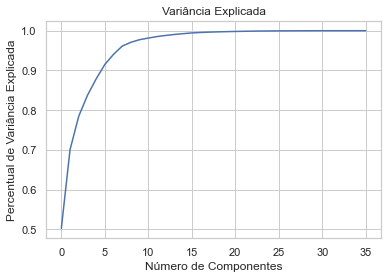

In [130]:
# Verific a Soma Cumulativa da Variância Explicada
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada')
plt.show()

In [131]:
# Pelo gráfico a partir de 10 componentes principais são suficientes. Será utilizado o valor 10.
pca = PCA(n_components=10)

In [132]:
# Fit e transforme do modelo PCA
arr_pca = pca.fit_transform(df_scaled)

In [133]:
# Cria a lista colunas do PCA
cols_PCA = ['PCA' + str(i) for i in range(1,11)]
cols_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

In [134]:
# Armazena os componentes em um dataframe
df_scaled_pca = pd.DataFrame(arr_pca, columns=cols_PCA)

In [135]:
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.189786,-0.225928,-0.070251,-0.061773,0.068859,-0.138118,0.036129,-0.006097,0.054610,-0.030597
1,9.243828,28.165459,9.693018,2.014850,-3.490405,6.142835,0.500529,0.333165,9.767022,1.717731
2,0.037149,0.276740,0.007367,0.076539,0.023640,-0.144762,-0.026214,0.050815,0.322028,-0.075613
3,0.224525,-0.182780,-0.168560,-0.105874,-0.069198,-0.069884,-0.085056,-0.009260,0.131555,-0.037318
4,43.391792,-9.788772,-11.472998,-9.508949,-21.790186,4.601164,-14.752986,-10.398444,1.856947,4.854393


In [136]:
### Aplicação da Escala Z em Componentes PCA Padronizados
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

In [137]:
# Cria o dataframe
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns= cols_PCA)

In [138]:
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062923
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523600,0.384417,16.696576,3.532591
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076746
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174424,9.983278


### Calculando o Fraud Score

In [139]:
# Loop para calcular o score por componente PCA
for i in range(1,11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2

In [140]:
# Colunas
col_scores = ['score' + str(i) for i in range(1,11)]

In [141]:
# Calcula o score de fraude
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis = 1) ** (1 / 2)

In [142]:
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062923,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211342
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523600,0.384417,16.696576,3.532591,4.721539,111.367812,30.968961,2.151928,8.188489,28.722446,0.274157,0.147776,278.775639,12.479198,21.858590
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076746,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306945
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174424,9.983278,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177396,143.953732,10.076965,99.665830,32.185882


In [143]:
# Dataframe final com score
df_score1 = pd.merge(df, df_pca_scaled_z.iloc[:,-1], left_index = True, right_index = True)

In [144]:
df_score1.shape

(1070994, 70)

In [145]:
df_score1.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858590
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.000000,1260.000000,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY

### Calculando o Score de Fraude 2 com Deep Learning
- Será usado o modelo Autoencoder.Essa é uma abordagem de aprendizado não supervisionado.

In [146]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [147]:
%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.2
numpy     : 1.20.3
pandas    : 1.3.4
matplotlib: 3.4.3
keras     : 2.9.0
tensorflow: 2.9.1
sklearn   : 0.24.2



In [148]:
# Carrega os dados com os 10 componentes principais
df_pca = df_pca_scaled_z.iloc[:,:10]

In [149]:
# Divisão em treino e teste
X_treino, X_teste = train_test_split(df_pca, test_size= 0.2, random_state= 42)

In [150]:
# Extrai os valores
X_treino = X_treino.values
X_teste = X_teste.values

In [151]:
X_treino.shape

(856795, 10)

### Construção do Modelo

In [152]:
# Hiperparâmetros
input_dim = X_treino.shape[1]
encoding_dim = 5
input_layer = Input(shape = (input_dim, ))

**input_layer ---> encoder ---> decoder**

In [153]:
# Modelo

# Encoder
encoder = Dense(encoding_dim, activation= 'tanh', activity_regularizer= regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim/2), activation='relu')(encoder)

# Decoder
decoder = Dense(int(encoding_dim/2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Modelo final
autoencoder = Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Hiperparâmetros de treinamento
num_epoch = 50
batch_size = 256

In [155]:
# Compila o modelo
autoencoder.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics=['accuracy'])

In [156]:
# Checkpoint
checkpointer = ModelCheckpoint(filepath= 'modelo/modelo_autoencoder.h5', verbose = 0, save_best_only= True)

In [157]:
tensorboard = TensorBoard(log_dir= '.\logs',
                         histogram_freq= 0,
                         write_graph= True,
                         write_images= True,
                         profile_batch= 100000000)

In [158]:
# Treinamento
history = autoencoder.fit(X_treino,
                         X_treino,
                         epochs= num_epoch,
                         batch_size = batch_size,
                         shuffle= True,
                         validation_data= (X_teste, X_teste),
                         verbose = 1, 
                         callbacks = [checkpointer, tensorboard]).history

Epoch 1/50
3347/3347 [==============================] - 10s 3ms/step - loss: 1.0024 - accuracy: 0.3275 - val_loss: 0.9101 - val_accuracy: 0.4302
Epoch 2/50
3347/3347 [==============================] - 8s 2ms/step - loss: 0.9906 - accuracy: 0.3932 - val_loss: 0.9042 - val_accuracy: 0.3567
Epoch 3/50
3347/3347 [==============================] - 8s 3ms/step - loss: 0.9847 - accuracy: 0.3799 - val_loss: 0.9004 - val_accuracy: 0.4337
Epoch 4/50
3347/3347 [==============================] - 8s 2ms/step - loss: 0.9800 - accuracy: 0.3937 - val_loss: 0.8966 - val_accuracy: 0.3962
Epoch 5/50
3347/3347 [==============================] - 8s 2ms/step - loss: 0.9746 - accuracy: 0.3996 - val_loss: 0.8928 - val_accuracy: 0.3990
Epoch 6/50
3347/3347 [==============================] - 8s 3ms/step - loss: 0.9709 - accuracy: 0.3932 - val_loss: 0.8902 - val_accuracy: 0.3987
Epoch 7/50
3347/3347 [==============================] - 8s 2ms/step - loss: 0.9668 - accuracy: 0.3692 - val_loss: 0.8879 - val_accuracy

### Avaliação do Modelo

In [159]:
autoencoder = load_model('modelo/modelo_autoencoder.h5')

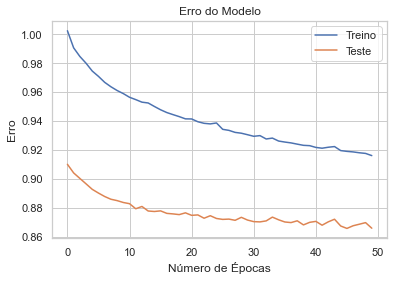

In [160]:
# Plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Erro')
plt.xlabel('Número de Épocas')
plt.legend(['Treino', 'Teste'], loc = 'upper right');

In [161]:
# Previsões
previsoes = autoencoder.predict(df_pca)
previsoes

33469/33469 [==============================] - 44s 1ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.04377589,
        0.        ],
       [0.        , 9.558708  , 7.4724255 , ..., 0.        , 5.61314   ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.67947775,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [162]:
# Previsões em dataframe
df_previsoes = pd.DataFrame(previsoes, columns = cols_PCA)

In [163]:
df_previsoes.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043776,0.000000
1,0.000000,9.558708,7.472425,0.000000,1.151486,0.000000,0.405458,0.000000,5.613140,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.679478,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191107,0.000000
4,1.451002,0.000000,0.000000,0.000000,0.000000,1.818488,0.000000,0.823332,0.000000,0.159252


In [164]:
df_previsoes.shape

(1070994, 10)

In [165]:
# Colunas do PCA
cols_pca = ['PCA' + str(i) for i in range(1,11)]

In [166]:
# Dataframe
df_autoencod = pd.DataFrame(0, index = np.arange(len(df_previsoes)), columns = cols_pca)

In [167]:
# Loop
for i in range(0,10):
    df_autoencod.iloc[:,i] = (df_previsoes.iloc[:,i] - df_pca_scaled_z.iloc[:,i]) ** 2

In [168]:
# Calcula o score 2
df_autoencod['Fraud Score 2'] = df_autoencod[cols_pca].sum(axis = 1) ** (1 / 2)

In [169]:
df_autoencod.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.002458,0.003959,0.195981
1,4.721539,0.988805,3.638362,2.151928,16.104490,28.722446,0.013957,0.147776,122.842544,12.479198,13.849587
2,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.016635,0.024181,0.274377
3,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.001141,0.005890,0.211614
4,76.543877,13.451864,43.387278,47.930008,319.134642,4.821578,238.177396,164.388403,10.076965,96.511477,31.850016


In [170]:
# Dataframe 
df_score2 = pd.merge(df_score1.iloc[:,1:], df_autoencod.iloc[:,-1], left_index= True, right_index= True)

In [171]:
df_score2.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.195981
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858590,13.849587
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.274377
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.211614
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.000000,1260.000000,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535

### Calculando o Score Final do Score de Fraude e Apresentando os Resultados

- rank() = busca o padrão linear nos dados da matriz

In [172]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [173]:
# Cópia do dataframe
df_fraudes = df_score2.copy()

In [174]:
# Calcula o Rank do Score1
df_fraudes['Rank_Fraud Score 1'] = df_fraudes['Fraud Score 1'].rank(ascending = True, method = 'first')
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.1,0.4,0.3,0.2,0.4,0.2,0.1,0.5,0.3,0.2,0.2,0.1,0.2,0.1,0.1,0.2,0.2,0.1,0.1,0.3,0.3,0.2,0.5,0.3,0.2,0.5,0.4,0.1,0.3,0.2,0.7,0.8,0.4,0.6,1.0,0.6,0.2,0.2,741726.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.5,4.0,11.7,34.0,1.3,2.3,72.2,4.3,12.3,92.3,1.9,3.5,37.6,0.4,0.7,92.2,1.8,3.4,55.6,2.9,9.8,41.6,1.7,3.7,95.2,4.9,15.9,58.8,2.6,5.6,134.6,2.7,4.9,296.8,9.5,20.9,21.9,13.8,1070274.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.8,0.7,0.6,2.2,1.1,0.6,0.9,0.7,0.7,1.2,0.3,0.2,2.5,0.4,0.2,1.2,0.3,0.2,0.7,0.5,0.5,2.7,1.4,1.0,1.2,0.8,0.9,0.8,0.4,0.3,8.8,2.2,1.4,3.8,1.6,1.1,0.6,0.3,1023940.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.3,2.1,3.1,0.8,3.6,3.1,0.3,2.3,3.2,0.4,1.0,0.9,0.9,1.2,1.0,0.4,0.9,0.9,0.2,1.5,2.6,1.0,4.8,5.1,0.4,2.6,4.2,0.3,1.4,1.5,3.1,7.4,6.8,1.3,5.0,5.5,0.3,0.2,964205.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.2,134.3,392.9,6.8,263.9,456.6,2.4,144.7,412.7,3.1,62.3,119.4,7.5,86.9,145.6,3.1,59.2,115.5,1.8,96.7,329.7,8.3,351.4,747.9,3.2,165.2,536.0,1.9,88.4,189.2,26.8,540.9,997.9,9.8,319.4,701.5,32.2,31.9,1070373.0


In [175]:
# Calcula o Rank do Score2
df_fraudes['Rank_Fraud Score 2'] = df_fraudes['Fraud Score 2'].rank(ascending = True, method = 'first')
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.1,0.4,0.3,0.2,0.4,0.2,0.1,0.5,0.3,0.2,0.2,0.1,0.2,0.1,0.1,0.2,0.2,0.1,0.1,0.3,0.3,0.2,0.5,0.3,0.2,0.5,0.4,0.1,0.3,0.2,0.7,0.8,0.4,0.6,1.0,0.6,0.2,0.2,741726.0,743008.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.5,4.0,11.7,34.0,1.3,2.3,72.2,4.3,12.3,92.3,1.9,3.5,37.6,0.4,0.7,92.2,1.8,3.4,55.6,2.9,9.8,41.6,1.7,3.7,95.2,4.9,15.9,58.8,2.6,5.6,134.6,2.7,4.9,296.8,9.5,20.9,21.9,13.8,1070274.0,1070137.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.8,0.7,0.6,2.2,1.1,0.6,0.9,0.7,0.7,1.2,0.3,0.2,2.5,0.4,0.2,1.2,0.3,0.2,0.7,0.5,0.5,2.7,1.4,1.0,1.2,0.8,0.9,0.8,0.4,0.3,8.8,2.2,1.4,3.8,1.6,1.1,0.6,0.3,1023940.0,974418.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.3,2.1,3.1,0.8,3.6,3.1,0.3,2.3,3.2,0.4,1.0,0.9,0.9,1.2,1.0,0.4,0.9,0.9,0.2,1.5,2.6,1.0,4.8,5.1,0.4,2.6,4.2,0.3,1.4,1.5,3.1,7.4,6.8,1.3,5.0,5.5,0.3,0.2,964205.0,784232.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.2,134.3,392.9,6.8,263.9,456.6,2.4,144.7,412.7,3.1,62.3,119.4,7.5,86.9,145.6,3.1,59.2,115.5,1.8,96.7,329.7,8.3,351.4,747.9,3.2,165.2,536.0,1.9,88.4,189.2,26.8,540.9,997.9,9.8,319.4,701.5,32.2,31.9,1070373.0,1070504.0


In [176]:
# Organiza os dados
df_fraudes.sort_values('Rank_Fraud Score 1', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2930000.0,1318500.0,1318500.0,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1201200.0,1201200.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.9,3553.0,5459.7,11.8,8664.3,9226.0,4.7,7525.6,8651.6,2.4,20917.6,85252.4,9.6,60709.7,142806.0,2.4,20929.4,85293.6,0.3,4297.3,8529.2,10.9,24947.9,45105.5,3.1,16116.6,31912.8,0.6,4824.8,10328.9,8.0,29889.5,55138.6,2.9,17432.3,38294.4,1024.7,1012.6,1070994.0,1070994.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4326303700.0,1946836665.0,1946836665.0,1946836665.0,1946836665.0,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,848484666.0,848484666.0,848484666.0,848484666.0,NaN,FINAL,2010/11,AC-TR,1617.4,3990.1,3575.6,9968.4,9827.2,8897.0,7667.2,8900.9,8062.2,1562.2,4829.2,4625.0,3885.1,6817.6,5712.8,1561.0,4587.7,4474.9,1402.7,6633.3,7094.1,20453.6,55324.4,48347.5,8402.8,33377.9,33151.9,996.1,6850.1,7332.3,13887.0,42436.0,39141.9,5025.4,24749.7,27184.5,914.7,911.5,1070993.0,1070993.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,374019883.0,1792808947.0,4668308947.0,1792808947.0,4668308947.0,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1644454002.0,4501180002.0,1644454002.0,4501180002.0,NaN,FINAL,2010/11,AC-TR,7.2,309.2,194.1,843.0,5868.2,5252.2,1217.1,6220.5,5790.2,3.5,206.8,132.0,92.1,3109.2,1736.9,96.3,5448.0,3542.7,1.3,261.2,172.8,451.0,16153.6,9735.2,338.1,27172.7,17935.1,2.2,293.3,209.3,329.1,19353.2,11900.6,310.1,29391.0,21521.6,870.2,865.2,1070992.0,1070992.0
132748,132749,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.0,1.0,NaN,2.0,710000.0,319500.0,319500.0,NaN,NaN,NaN,BROADWAY,10025,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.3,0.1,0.1,3366.9,0.3,0.2,1957.5,0.2,0.2,1329.8,0.2,0.2,1951.5,0.5,0.5,1528.9,0.2,0.2,975.4,0.1,0.2,4446.1,0.5,0.5,1672.0,0.2,0.4,1032.8,0.1,0.1,14398.9,0.7,0.7,5210.7,0.4,0.5,866.9,851.9,1070991.0,1070991.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1.0,1.0,NaN,2.0,836000.0,28800.0,50160.0,NaN,NaN,NaN,20 EMILY COURT,10307,NaN,36.0,45.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,2581.8,0.3,0.3,2286.5,0.3,0.3,2289.6,0.3,0.4,3632.5,0.7,0.8,4978.1,1.0,1.0,5152.1,1.0,1.0,6191.4,0.9,0.9,5655.2,0.5,0.5,5395.9,0.6,0.6,2432.1,0.8,0.9,2595.9,0.4,0.4,1636.1,0.4,0.4,830.5,802.3,1070990.0,1070990.0


In [177]:
# Score final
df_fraudes['Final Score'] = (df_fraudes['Fraud Score 1'] * df_fraudes['Rank_Fraud Score 1']) +(df_fraudes['Fraud Score 2'] * df_fraudes['Rank_Fraud Score 2'])

In [178]:
# Rank do Score Final
df_fraudes['Final Rank'] = df_fraudes['Final Score'].rank(ascending = False, method = 'first')

In [179]:
# Resultado 
df_fraudes.sort_values('Final Rank', ascending = True).head(20)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2,Final Score,Final Rank
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2930000.0,1318500.0,1318500.0,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1201200.0,1201200.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.9,3553.0,5459.7,11.8,8664.3,9226.0,4.7,7525.6,8651.6,2.4,20917.6,85252.4,9.6,60709.7,142806.0,2.4,20929.4,85293.6,0.3,4297.3,8529.2,10.9,24947.9,45105.5,3.1,16116.6,31912.8,0.6,4824.8,10328.9,8.0,29889.5,55138.6,2.9,17432.3,38294.4,1024.7,1012.6,1070994.0,1070994.0,2181920805.5,1.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4326303700.0,1946836665.0,1946836665.0,1946836665.0,1946836665.0,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,848484666.0,848484666.0,848484666.0,848484666.0,NaN,FINAL,2010/11,AC-TR,1617.4,3990.1,3575.6,9968.4,9827.2,8897.0,7667.2,8900.9,8062.2,1562.2,4829.2,4625.0,3885.1,6817.6,5712.8,1561.0,4587.7,4474.9,1402.7,6633.3,7094.1,20453.6,55324.4,48347.5,8402.8,33377.9,33151.9,996.1,6850.1,7332.3,13887.0,42436.0,39141.9,5025.4,24749.7,27184.5,914.7,911.5,1070993.0,1070993.0,1955892622.4,2.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,374019883.0,1792808947.0,4668308947.0,1792808947.0,4668308947.0,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1644454002.0,4501180002.0,1644454002.0,4501180002.0,NaN,FINAL,2010/11,AC-TR,7.2,309.2,194.1,843.0,5868.2,5252.2,1217.1,6220.5,5790.2,3.5,206.8,132.0,92.1,3109.2,1736.9,96.3,5448.0,3542.7,1.3,261.2,172.8,451.0,16153.6,9735.2,338.1,27172.7,17935.1,2.2,293.3,209.3,329.1,19353.2,11900.6,310.1,29391.0,21521.6,870.2,865.2,1070992.0,1070992.0,1858582900.3,3.0
132748,132749,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.0,1.0,NaN,2.0,710000.0,319500.0,319500.0,NaN,NaN,NaN,BROADWAY,10025,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.3,0.1,0.1,3366.9,0.3,0.2,1957.5,0.2,0.2,1329.8,0.2,0.2,1951.5,0.5,0.5,1528.9,0.2,0.2,975.4,0.1,0.2,4446.1,0.5,0.5,1672.0,0.2,0.4,1032.8,0.1,0.1,14398.9,0.7,0.7,5210.7,0.4,0.5,866.9,851.9,1070991.0,1070991.0,1840818556.8,4.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1.0,1.0,NaN,2.0,836000.0,28800.0,50160.0,NaN,NaN,NaN,20 EMILY COURT,10307,NaN,36.0,45.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,2581.8,0.3,0.3,2286.5,0.3,0.3,2289.6,0.3,0.4,3632.5,0.7,0.8,4978.1,1.0,1.0,5152.1,1.0,1.0,6191.4,0.9,0.9,5655.2,0.5,0.5,5395.9,0.6,0.6,2432.1,0.8,0.9,2595.9,0.4,0.4,1636.1,0.4,0.4,830.5,802.3,1070990.0,1070990.0,1748644751.2,5.0
585117,585118,4004200001,4,420,1,NaN,NEW YORK CITY ECONOMI,O3,4,298.0,402.0,NaN,20.0,3443400.0,1549530.0,1549530.0,NaN,NaN,NaN,28-10 QUEENS PLAZA SOUTH,11101,X1,1.0,1.0,1585494.0,1585494.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.2,1729.1,610.4,1.5,2836.7,1275.5,0.5,1849.5,771.8,0.1,3997.5,3

### Fim